Bloco 1: Instalação de Dependências

In [1]:
import sys
!{sys.executable} -m pip install pyarrow

Bloco 2: Importação de Bibliotecas

In [2]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import json

Bloco 3: Carregar Dados RFM (Entrada para Modelagem)

In [3]:
# Carregando o arquivo Parquet com as features RFM
caminho_rfm = '../data/curated/rfm_features.parquet' 
df_rfm = pd.read_parquet(caminho_rfm)

print("DataFrame RFM carregado com sucesso e pronto para a modelagem!")
display(df_rfm.head())

DataFrame RFM carregado com sucesso e pronto para a modelagem!


,Recencia,Frequencia,ValorMonetario
fk_contact,,,
00007a5d618cd250d7f05766cfe01a8663a3767f1cd669eebe57f83f03b51e3e,485,4,688.48
00026c6e9ff2f6387766bc6b4b4f1d1a282c60c9976064ea4e0cf8d5163aca98,249,1,79.44
00026fad47197aa4c6ee22af325a80bf1001209f21021d2755f5cbaf4c453135,373,1,271.79
0002b73c84f0f22a291226e3aec6596de90488f776ef23e9ba15338caeb935a7,1842,1,35.42
0003a32718f6bcdb2bf379f645c23e13f56b7b1d43d9531482e987849df7410f,515,1,95.72


Bloco 4: Normalização dos Dados

In [4]:
# Inicializando o normalizador
scaler = StandardScaler()

# Aplicando a normalização nos dados do df_rfm
df_rfm_scaled_array = scaler.fit_transform(df_rfm)

# Convertendo o array de volta para um DataFrame do Pandas
df_rfm_scaled = pd.DataFrame(df_rfm_scaled_array, index=df_rfm.index, columns=df_rfm.columns)

print("Amostra dos dados após a normalização:")
display(df_rfm_scaled.head())

Amostra dos dados após a normalização:


,Recencia,Frequencia,ValorMonetario
fk_contact,,,
00007a5d618cd250d7f05766cfe01a8663a3767f1cd669eebe57f83f03b51e3e,-0.623413,0.182133,0.221159
00026c6e9ff2f6387766bc6b4b4f1d1a282c60c9976064ea4e0cf8d5163aca98,-0.892285,-0.337049,-0.402672
00026fad47197aa4c6ee22af325a80bf1001209f21021d2755f5cbaf4c453135,-0.751013,-0.337049,-0.205651
0002b73c84f0f22a291226e3aec6596de90488f776ef23e9ba15338caeb935a7,0.922606,-0.337049,-0.447761
0003a32718f6bcdb2bf379f645c23e13f56b7b1d43d9531482e987849df7410f,-0.589234,-0.337049,-0.385997


Bloco 5: Método do Cotovelo (Elbow Method)

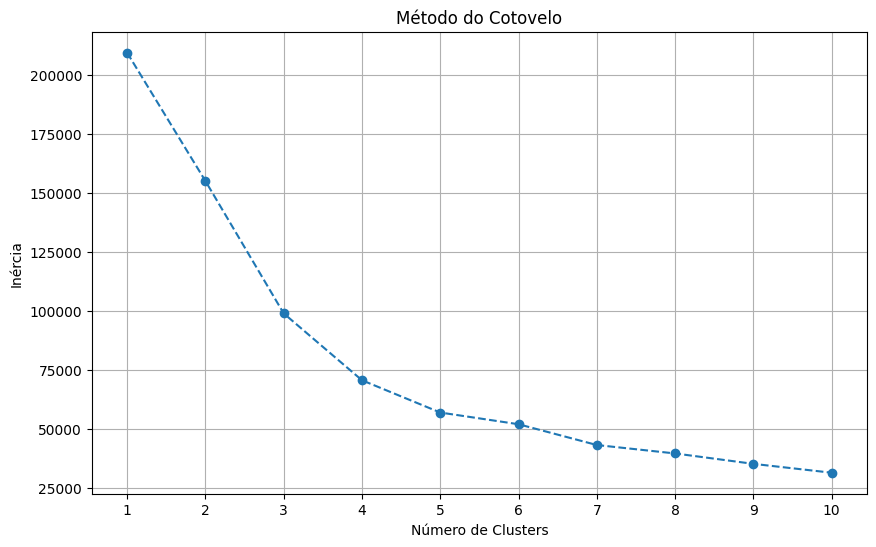

In [5]:
# Lista para guardar os valores de inércia
inertia = []
range_n_clusters = range(1, 11) # Vamos testar de 1 a 10 clusters

for n_clusters in range_n_clusters:
    # Cria e treina o modelo K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(df_rfm_scaled)
    
    # Guarda a inércia do modelo treinado
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

Bloco 6: Aplicação do Modelo K-Means Final

In [6]:
# Definindo o número de clusters com base na análise do gráfico
numero_ideal_clusters = 4

# Criando e treinando o modelo K-Means definitivo
kmeans = KMeans(n_clusters=numero_ideal_clusters, random_state=42, n_init='auto')
kmeans.fit(df_rfm_scaled) # Usamos os dados normalizados para treinar

# Adicionando uma nova coluna com o rótulo do cluster ao DataFrame RFM ORIGINAL (não normalizado)
df_rfm['Cluster'] = kmeans.labels_

print("DataFrame RFM com os clientes devidamente clusterizados:")
display(df_rfm.head())

DataFrame RFM com os clientes devidamente clusterizados:


,Recencia,Frequencia,ValorMonetario,Cluster
fk_contact,,,,
00007a5d618cd250d7f05766cfe01a8663a3767f1cd669eebe57f83f03b51e3e,485,4,688.48,1
00026c6e9ff2f6387766bc6b4b4f1d1a282c60c9976064ea4e0cf8d5163aca98,249,1,79.44,1
00026fad47197aa4c6ee22af325a80bf1001209f21021d2755f5cbaf4c453135,373,1,271.79,1
0002b73c84f0f22a291226e3aec6596de90488f776ef23e9ba15338caeb935a7,1842,1,35.42,0
0003a32718f6bcdb2bf379f645c23e13f56b7b1d43d9531482e987849df7410f,515,1,95.72,1


Bloco 7: Análise e Interpretação dos Clusters

In [7]:
# Agrupamos por 'Cluster' e calculamos as médias de RFM e a contagem de clientes
cluster_analysis = df_rfm.groupby('Cluster').agg(
    Recencia_Media=('Recencia', 'mean'),
    Frequencia_Media=('Frequencia', 'mean'),
    ValorMonetario_Medio=('ValorMonetario', 'mean'),
    Contagem_Clientes=('Recencia', 'count')
).round(2)

print("Análise dos Clusters:")
display(cluster_analysis)

Análise dos Clusters:


,Recencia_Media,Frequencia_Media,ValorMonetario_Medio,Contagem_Clientes
Cluster,,,,
0,2152.34,1.63,262.77,21643
1,539.59,2.42,397.98,45433
2,241.48,106.66,20861.70,56
3,355.10,20.35,2999.58,2686


Bloco 8: Mapeamento de Personas e Criação do Arquivo Mestre (Output)

In [8]:
print("Carregando o mapeamento de aliases de clientes...")
with open('../data/processed/mapa_clientes_alias.json', 'r') as f:
    mapa_clientes = json.load(f)

# Criando o dicionário de mapeamento com os nomes das personas
# (Ajuste os números do cluster (0, 1, 2, 3) conforme a sua análise do Bloco 7)
mapeamento_clusters = {
    1: "Campeões",   
    0: "Fiéis",
    3: "Em Risco",  
    2: "Perdidos"       
}

# Criando a coluna 'segmento' com os nomes das personas
df_rfm['segmento'] = df_rfm['Cluster'].map(mapeamento_clusters)

# Preparando o DataFrame para salvar (resetando o índice para usar o 'fk_contact' como coluna)
df_final_customers = df_rfm.reset_index().rename(columns={'fk_contact': 'id_cliente'})

# Usando o mapa de aliases para criar a coluna de nome do cliente
df_final_customers['nome_cliente'] = df_final_customers['id_cliente'].map(mapa_clientes)

# Adicionando colunas de placeholder que serão preenchidas nos próximos notebooks
df_final_customers['prob_compra_7d'] = 0.0
df_final_customers['prob_compra_30d'] = 0.0
df_final_customers['sugestao_prox_produto'] = "Aguardando recomendação"
df_final_customers['data_prox_viagem'] = "Aguardando previsão"

# Selecionando e ordenando as colunas finais para o arquivo mestre
colunas_finais = [
    'id_cliente', 
    'nome_cliente', 
    'segmento',
    'prob_compra_7d',
    'prob_compra_30d', 
    'sugestao_prox_produto', 
    'data_prox_viagem'
]
df_final_customers = df_final_customers[colunas_finais]

# Salvando o arquivo mestre
caminho_customers = '../data/redis/customers.parquet'
df_final_customers.to_parquet(caminho_customers, index=False)

print(f"Arquivo final 'customers.parquet' criado com sucesso!")
display(df_final_customers.head())

Carregando o mapeamento de aliases de clientes...
Arquivo final 'customers.parquet' criado com sucesso!


,id_cliente,nome_cliente,segmento,prob_compra_7d,prob_compra_30d,sugestao_prox_produto,data_prox_viagem
0,00007a5d618cd250d7f05766cfe01a8663a3767f1cd669...,Maria Flor Fonseca,Campeões,0.0,0.0,Aguardando recomendação,Aguardando previsão
1,00026c6e9ff2f6387766bc6b4b4f1d1a282c60c9976064...,Gabrielly Vasconcelos,Campeões,0.0,0.0,Aguardando recomendação,Aguardando previsão
2,00026fad47197aa4c6ee22af325a80bf1001209f21021d...,Mathias Caldeira,Campeões,0.0,0.0,Aguardando recomendação,Aguardando previsão
3,0002b73c84f0f22a291226e3aec6596de90488f776ef23...,Erick Ribeiro,Fiéis,0.0,0.0,Aguardando recomendação,Aguardando previsão
4,0003a32718f6bcdb2bf379f645c23e13f56b7b1d43d953...,João Lucas da Cunha,Campeões,0.0,0.0,Aguardando recomendação,Aguardando previsão
